### ===Task===

Your work: Let's modify the above scratch code:
- Modify so it print out the total within-cluster variation.  Then try to run several k and identify which k is best.
- Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.
- Put everything into a class

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
from time import time

class kmeans:
    def __init__(self, precent_batch=50, tol=1e-2, max_iter=10000):
        self.precent_batch = precent_batch
        self.tol = tol
        self.max_iter = max_iter

    def plot_K_variation(self, X, K_max):
        variation_list = []
        K_list = range(2,K_max+1)
        for K in K_list:
            self.fit(X, K)
            print('K:', K, ', Number of iteration:', self.iteration, ', Variation', self.variation)
            variation_list.append(self.variation)
        plt.plot(K_list, variation_list)
        plt.xlabel('K')
        plt.ylabel('Variation')
    
    def fit(self, X, n_clusters):
        m, n = X.shape

        #1. randomly choose n clusters from X
        #you can also randomly generate any two points
        rng = np.random.RandomState(42)
        i = rng.permutation(m)[:n_clusters]
        self.centers = X[i]

        for iter in range(self.max_iter):
            batch_size = int(self.precent_batch*m/100)
            batch_idx = np.random.permutation(m)
            X_batch = X[batch_idx[:batch_size]]
            #2. assign lables based on closest center
            #return the index of centers having smallest
            #distance with X
            labels = pairwise_distances_argmin(X_batch, self.centers)

            #3. find new centers
            new_centers = []
            for i in range(n_clusters):
                new_centers.append(X_batch[labels == i].mean(axis=0))

            #convert list to np.array; you can actually combine #3
            #with np.array in one sentence 
            new_centers = np.array(new_centers)

            #4 stopping criteria - if centers do not 
            #change anymore, we stop!
            if(np.allclose(self.centers, new_centers, rtol=self.tol)):
                break
            else:
                self.centers = new_centers
        self.iteration = iter+1
        self.variation = 0
        labels = pairwise_distances_argmin(X, self.centers)
        for i in range(n_clusters):
            self.variation += np.sum((X[labels==i]-np.mean(X[labels==i],axis=0))**2)
            
            
    def predict(self, X):
        return pairwise_distances_argmin(X, self.centers)

K: 2 , Number of iteration: 8 , Variation 23901.662839172765
K: 3 , Number of iteration: 3 , Variation 4027.825416895559
K: 4 , Number of iteration: 45 , Variation 1042.961220642395
K: 5 , Number of iteration: 69 , Variation 944.4620545455698
K: 6 , Number of iteration: 5 , Variation 891.1775965250613
K: 7 , Number of iteration: 33 , Variation 801.1060562085681
K: 8 , Number of iteration: 294 , Variation 767.5267080023796
K: 9 , Number of iteration: 277 , Variation 679.7166459667055
K: 10 , Number of iteration: 10000 , Variation 627.9952188935835


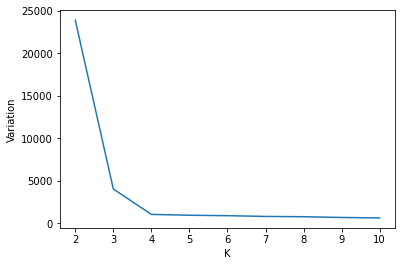

In [17]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60)

model = kmeans(precent_batch=50)
model.plot_K_variation(X,10)

In [18]:
model.fit(X, 4)
x_label = model.predict(X)

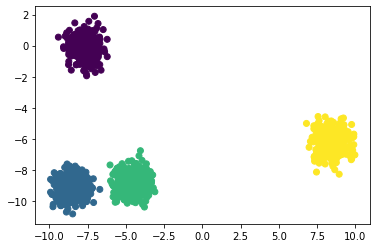

In [19]:
plt.scatter(X[:,0],X[:,1],c=x_label)